<div style="text-align: center;">

# Air Pollution in Seoul: EDA with visualization by maps 🗺

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Map_Seoul_districts_de.png/600px-Map_Seoul_districts_de.png" width="350" height="250">

<span style="text-align: center;"><i>image form Wikipedia</i></span>
    
</div><br>





**Language:** English (🇺🇸) and Portuguese (🇧🇷)

Created: 2020-08-14; (14/08/2020)

Last updated: 2020-08-14; (14/08/2020)

## DataSet Description

[Link Kaggle - Air Pollution In Seoul](https://www.kaggle.com/bappekim/air-pollution-in-seoul)

This dataset deals with air pollution measurement information in Seoul, South Korea.
Seoul Metropolitan Government provides many public data, including air pollution information, through the 'Open Data Plaza'
I made a structured dataset by collecting and adjusting various air pollution related datasets provided by the Seoul Metropolitan Government.

## Brief Summary of DataSet

This data provides average values for six pollutants (SO2, NO2, CO, O3, PM10, PM2.5).

+ Data were measured every hour between 2017 (01-01-2017) and 2019 (31-12-2019).
+ Data were measured for 25 districts in Seoul.
+ This dataset is divided into four files.

- Measurement info (`Measurement_info.csv`):
  + Air pollution measurement information
  + 1 hour average measurement is provided after calibration Instrument status:
    - 0: Normal, 1: Need for calibration, 2: Abnormal
    - 4: Power cut off, 8: Under repair, 9: abnormal data
    
+ Measurement item info (`Measurement_item_info.csv`): 
  - Information on air pollution measurement items

+ Measurement station info (`Measurement_station_info.csv`): 
  - Information on air pollution instrument stations

+ Measurement summary (`Measurement_summary.csv`): 
    - A condensed dataset based on the above three data.
  

  
## Others References

**Seoul map source by district in JSON**
+ [Git](https://github.com/southkorea/seoul-maps/blob/master/kostat/2013/json/seoul_municipalities_geo_simple.json)

## Understanding some Polluants

**PM (*particulate matter*)**

Measured in Mircrogram/m3.

PMs are divided into two categories: PM10, which comprises particles between 2.5 and 10 millionths of a millimeter or micrometers; and PM2.5, which is less than 2.5 micrometers, thirty times less than the thickness of a human hair.

The particulate material is a mixture of various materials, being almost five times thinner than a hair or the same smaller ones that have liquid chemicals. These substances can be composed of organic compounds, compounds, such as sulfates and nitrates, metals and even dust.

Particulate matter such as PM10, PM2.5, PM1 and PM0.1 is defined as the fraction of particles with an aerodynamic diameter smaller than respectively 10, 2.5, 1 and 0.1 µm (for your information: 1 µm = 1 millionth of a meter or 1 thousandth of a millimeter). In comparison, the average diameter of a human hair equals 50-70 µm (see figure below)

![](https://www.irceline.be/nl/documentatie/faq/pmsize1)

**O3**

1- Good ozone: 20 kilometers above them helps to protect the eyes and skin from UV radiation (ozone layer).

2- Bad Ozone: at ground level, depending on the concentration, it harms the lungs.

It is the ozone found in the troposphere, produced by man, as the result of air pollution from internal combustion engines and power plants. Automobile exhaust and industrial emissions release a range of nitrous oxide (NOx) gases and volatile organic compounds (VOC), by-products of burning gasoline and coal. NOx and VOC's combine chemically with oxygen to form ozone during sunny days with high temperatures in late spring, summer and early fall.



## TODO News ideias

+ Evoluçâo do PM.2.5 pois é o que tem mais mediçôes negativas

## Table of contents (TOC) <a id="top"></a>

**Data Preprocessing and Understanding DataSet**
- [Import Libs and DataSet](#index01)
- [Clean the Data](#index02)
- [Deal with missing data](#index03)
- [Snippets](#index04)
- [Handler invalid data or outliers](#index05)
  + [Check and analyze distribution of gas data](#index06)
  + [Remove invalid values](#index07)
  + [Handler with outilers](#index08)
- [Feature engineering](#index09)

**Questions Over DataSet**
- [How SO2 has evolved over the years?](#index10)
- [What is the average gas pollution for each district and which has more or less?](#index11)
- [Are there any negative measurements of pollutants?](#index12)
- [Where is Bad and Very Bads measures?](#index13)

## Import Libs and DataSet <a id ='index01'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import datetime

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models.tools import HoverTool
from bokeh.models import GeoJSONDataSource
from bokeh.layouts import row
output_notebook()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading BokehJS ...

/kaggle/input/seoul-map-geojson/seoul_municipalities_geo_simple.json
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv


In [2]:
# Import DataFrame

df = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [3]:
# Information on the dangerousness of the concentration of each gas

df_gas_info = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv')
df_gas_info

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [4]:
# Create dict to pollutants level

list_cols = list(df_gas_info.columns)[3:]

level_dangerous = {}
for i in range(len(df_gas_info)):
    name = df_gas_info["Item name"][i]
    level_dangerous[name] = df_gas_info[list_cols].loc[i].tolist()
    
level_dangerous

{'SO2': [0.02, 0.05, 0.15, 1.0],
 'NO2': [0.03, 0.06, 0.2, 2.0],
 'CO': [2.0, 9.0, 15.0, 50.0],
 'O3': [0.03, 0.09, 0.15, 0.5],
 'PM10': [30.0, 80.0, 150.0, 600.0],
 'PM2.5': [15.0, 35.0, 75.0, 500.0]}

In [5]:
# Import geo_json with geopandas

import geopandas as gpd

seoul_geojson = gpd.read_file('../input/seoul-map-geojson/seoul_municipalities_geo_simple.json')
seoul_geojson = seoul_geojson.drop(['code', 'base_year'], axis = 1)
seoul_geojson.head()

,name,name_eng,geometry
0,강동구,Gangdong-gu,"POLYGON ((127.11520 37.55753, 127.11880 37.557..."
1,송파구,Songpa-gu,"POLYGON ((127.06907 37.52228, 127.07496 37.520..."
2,강남구,Gangnam-gu,"POLYGON ((127.05867 37.52630, 127.06907 37.522..."
3,서초구,Seocho-gu,"POLYGON ((127.01397 37.52504, 127.01918 37.520..."
4,관악구,Gwanak-gu,"POLYGON ((126.98368 37.47386, 126.98464 37.469..."


## Clean the Data <a id ='index02'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

🇺🇸

+ Convert Address to Distict
  - Convert this string: `369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea` => to: `Jungnang-gu`
+  Retire Useless features
   - `Latitude`, `Longitude`, and `State code`, because is the same to each district
+ Convert Date to date type in pandas

🇧🇷


+ Converter endereço para Distrito:
  - Converterter *strings* desse tipo: `369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea` => para somente distrito: `Jungnang-gu`
+ Retirar *features* inúteis:
  - `Latitude`, `Longitude`, e `State code`, pois vamos considerar cada ponto de medida como o do distrito
+ Converter *date* para o tipo de data do *pandas*

In [6]:
df['Address'].value_counts().head(3)

71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea    25906
369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea         25906
10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea            25905
Name: Address, dtype: int64

In [7]:
df['Address'] = df['Address'].map(lambda street: street.split(',')[2].strip())
df['Address'].value_counts().head(3)

Gangseo-gu     25906
Jungnang-gu    25906
Jung-gu        25905
Name: Address, dtype: int64

In [8]:
df = df.drop(['Latitude', 'Longitude', 'Station code'], axis = 1).rename( columns = {'Address': 'District', 'Measurement date': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      647511 non-null  datetime64[ns]
 1   District  647511 non-null  object        
 2   SO2       647511 non-null  float64       
 3   NO2       647511 non-null  float64       
 4   O3        647511 non-null  float64       
 5   CO        647511 non-null  float64       
 6   PM10      647511 non-null  float64       
 7   PM2.5     647511 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 39.5+ MB


In [10]:
# Final dataSet

df.head()

,Date,District,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,Jongno-gu,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00:00,Jongno-gu,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00:00,Jongno-gu,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00:00,Jongno-gu,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00:00,Jongno-gu,0.003,0.051,0.002,1.2,69.0,61.0


## Deal with missing data <a id ='index03'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

**No missing data**

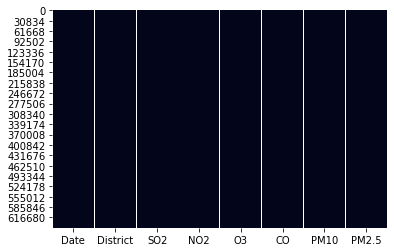

In [11]:
import missingno as msno
sns.heatmap(df.isnull(), cbar=False)

## Snippets <a id ='index04'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

In [12]:
def generate_GeoJSONSource_to_districts(my_df, column_value):
    """
    Generate GeoJSONDataSource. This is necessary to each part of GeoPlot except calculate low and high of colors
        By default must be 'District' in all df in.
    """
    with open('../input/seoul-map-geojson/seoul_municipalities_geo_simple.json') as json_file:
        data = json.load(json_file)
    if(len(my_df) != 25):
        raise Exception('df with len != 25')
    if('District' not in list(my_df.columns) ):
        raise Exception('df not contains "District"')
    for i in range(25):
        city = data['features'][i]['properties']['name_eng']
        index = my_df.query('District == "' + city +'"').index[0]
        data['features'][i]['properties'][column_value] = my_df[column_value][index]
        data['features'][i]['properties']['District'] = my_df['District'][index]
    geo_source = GeoJSONDataSource( geojson = json.dumps(data, separators=(',', ':')) )
    return geo_source  

In [13]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, HoverTool, ColorBar
from bokeh.palettes import magma,viridis,cividis, inferno

def eda_seoul_districts_geo_plot(geosource, df_in, title, column, state_column, low = -1, high = -1, palette = -1):
    """
    Generate Bokeh Plot to Brazil States:
        geosource: GeoJSONDataSource of Bokeh
        df_in: DataSet before transformed in GeoJSONDataSource
        title: title of plot
        column: column of df_in to be placed values in geoplot
        state_column: indicate column with names of States
        low = (optional) min value of range of color spectre
        high = (optional) max values of range of color spectre
        palette: (optional) can be magma, viridis, civis, inferno e etc.. (with number os colors)
            Example: cividis(8) (8 colors to classify), cividis(256)  (256, more colors to clasify)
    """
    if high == -1:
        high = max(df_in[column])
    if low == -1:
        low = min(df_in[column])
    if palette == -1:
        palette = inferno(32)
        
    palette = palette[::-1]
    color_mapper = LinearColorMapper(palette = palette, low = low, high = high)
    
    hover = HoverTool(tooltips = [ ('District','@{'+state_column+'}'), (column, '@{'+column+'}{%.6f}')],
                  formatters={'@{'+column+'}' : 'printf'})

    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 300, height = 20, 
                         border_line_color=None, location = (0,0),  orientation = 'horizontal')

    p = figure(title = title, plot_height = 430, plot_width = 330, tools = [hover])

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.visible = False
    p.yaxis.visible = False

    p.patches('xs','ys', source = geosource, line_color = 'black', line_width = 0.25,
              fill_alpha = 1, fill_color = {'field' : str(column), 'transform' : color_mapper})

    p.add_layout(color_bar, 'below')
    return p   

In [14]:
from bokeh.palettes import Turbo256 
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import magma,viridis,cividis, inferno

def eda_bokeh_horiz_bar_ranked(df, column_target, title = '', int_top = 3, second_target = 'state'):
    """
    Generate Bokeh Plot ranking top fists and last value:
        df: data_frame
        column_targe: a column of df inputed
        title: title of plot
        int_top: number of the tops
        column: column of df_in to be placed values in geoplot
        second_targe = 'state'
    """
    ranked = df.sort_values(by=column_target).reset_index(drop = True)
    top_int = int_top
    top = ranked[:top_int].append(ranked[-top_int:])
    top.index = top.index + 1
    source = ColumnDataSource(data=top)
    list_second_target = source.data[second_target].tolist()
    index_label = list_second_target[::-1] # reverse order label

    p = figure(plot_width=500, plot_height=400, y_range=index_label, 
                toolbar_location=None, title=title)   

    p.hbar(y=second_target, right=column_target, source=source, height=0.85, line_color="#000000",
          fill_color=factor_cmap(second_target, palette=inferno(16)[::-1], factors=list_second_target))
    p.x_range.start = 0  # start value of the x-axis

    p.xaxis.axis_label = "value of '" + column_target + "'"

    hover = HoverTool()  # initiate hover tool
    hover.tooltips = [("Value","@{" + column_target + "}{%.6f}" ),   
                       ("Ranking","@index°")]
    hover.formatters={'@{'+column_target+'}' : 'printf'}

    hover.mode = 'hline' # set the mode of the hover tool
    p.add_tools(hover)   # add the hover tooltip to the plot

    return p # show in notebook

In [15]:
def eda_foward_2_plots(my_df, primary_column, target_column, first_title, second_title, int_top = 8, location_column = 'District'):
    """
    Execute and show all together:
    @ primary_columns must to be a float to join to make a GeoSource
    generate_GeoJSONSource_to_districts()
    eda_seoul_districts_geo_plot()
    eda_bokeh_horiz_bar_ranked()
    """
    my_df = my_df.rename({primary_column: target_column}, axis = 1)

    geo_source = generate_GeoJSONSource_to_districts(my_df, target_column)

    geo = eda_seoul_districts_geo_plot(geo_source, my_df, first_title,
                                       target_column, location_column, palette = inferno(32))

    rank = eda_bokeh_horiz_bar_ranked(my_df, target_column, second_title,
                                      int_top = int_top, second_target = location_column)

    show( row( geo, rank ))

In [16]:
def eda_categ_feat_desc_plot(series_categorical, title = ""):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], row['quantity'], color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [17]:
def measurement_evaluator(value, column):
    if(pd.isnull(value) or value < 0):
        return 'Error'
    elif(value <= level_dangerous[column][0]):
        return 'Good'
    elif(value <= level_dangerous[column][1]):
        return 'Normal'
    elif(value <= level_dangerous[column][2]):
        return 'Bad'
    else:
        return 'Very bad'
    return value

In [18]:
def generate_level_danger_gas_series(my_df, column):
    series = my_df[column].map(lambda x: measurement_evaluator(x, column))
    return series

## Handler invalid data or outliers <a id ='index05'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

### Check and analyze distribution of gas data <a id ='index06'></a>

NameError: name 'fig' is not defined

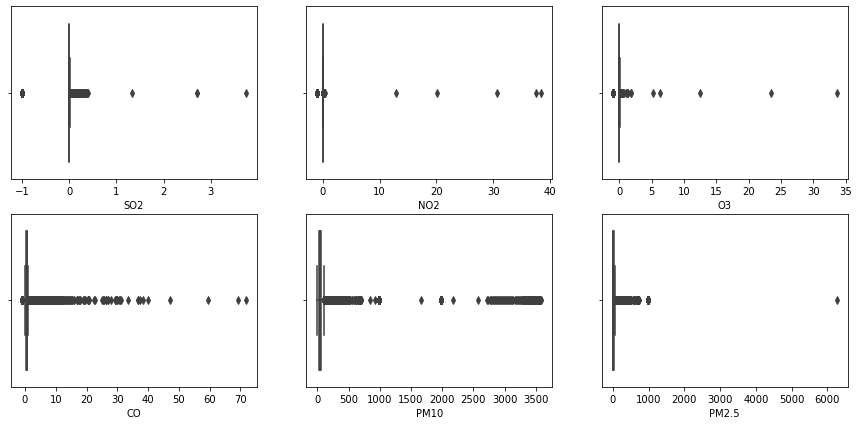

In [19]:
# Generate many boxplots to each pollutant data

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(15, 7), sharex=False)

map_feat_ax = {'SO2': ax1, 'NO2': ax2, 'O3': ax3, 'CO': ax4, 'PM10': ax5, 'PM2.5': ax6}

for key, value in map_feat_ax.items():
    sns.boxplot(x=df[key], ax=value)
    
fig.suptitle('Distribution to each polluant', fontsize=18)
    
plt.show()

In [20]:
# Generate DataFrame with each 'describe' to each pollutant data

gas_list = list(map_feat_ax.keys())

list_describes = []
for f in gas_list:
    list_describes.append(df[f].describe())

df_describe_gas = pd.concat(list_describes, axis = 1)
df_describe_gas   

,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


🇺🇸

We have some invalid data, those with values less than zero, and some outiliers with very high values above normal.

🇧🇷

Temos alguns dados inválidos, aqueles com valores menores que zero, e alguns outiliers com valores muito altos acima do normal.


### Remove invalid values <a id ='index07'></a> <a id ='index05'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

There are values less than 0, which is impossible for a gas measurement. Then it will be removed

In [21]:
# Before

df.shape

(647511, 8)

In [22]:
condicional = df[gas_list] > 0.0

df = df[condicional.all(axis=1)]
df.shape

(632447, 8)

🇺🇸

Was removed 647,511 - 632,447 = 15,064 rows

🇧🇷

Foi removido 647.511 - 632.447 = 15.064 rows

### Handler with outilers <a id ='index08'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

🇺🇸

using z-score we will remove the outliers

🇧🇷

usando z-score vamos remover os outliers

In [23]:
# Before

df.shape

(632447, 8)

In [24]:
# Remove rows where one of gas data has z_score bigger than threshold

# link to talbe of z score associated to percentage of distriution: associated
## https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf
## Examples
# 3 = .99865 = 99,85%
# 2 = .97725 = 97,72%

from scipy import stats

z = np.abs(stats.zscore(df[gas_list]))

threshold = 2

df = df[(z < 2).all(axis=1)]
df.shape

(616336, 8)

Was removed 632.447 - 616336 = 16.111 rows

NameError: name 'fig' is not defined

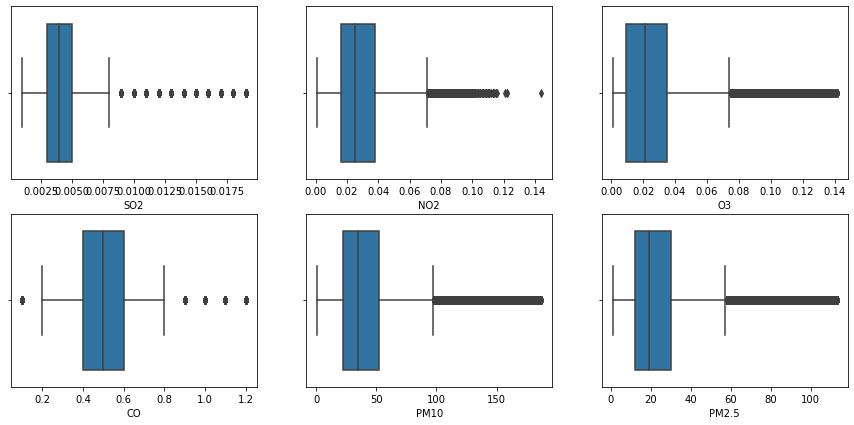

In [25]:
# Finally, we have ...

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(15, 7), sharex=False)

map_feat_ax = {'SO2': ax1, 'NO2': ax2, 'O3': ax3, 'CO': ax4, 'PM10': ax5, 'PM2.5': ax6}

for key, value in map_feat_ax.items():
    sns.boxplot(x=df[key], ax=value)
    
fig.suptitle('Distribution of polluants after remove outiliers', fontsize=18)
    
plt.show()

In [26]:
# Show describe() to each pollutant

gas_list = list(map_feat_ax.keys())

list_describes = []
for f in gas_list:
    list_describes.append(df[f].describe())

df_describe_gas1 = pd.concat(list_describes, axis = 1)
df_describe_gas1  

,SO2,NO2,O3,CO,PM10,PM2.5
count,616336.000000,616336.000000,616336.000000,616336.000000,616336.000000,616336.000000
mean,0.004288,0.028074,0.024670,0.501521,40.194665,23.186651
std,0.001665,0.015367,0.019022,0.211001,25.887525,16.926675
min,0.001000,0.001000,0.001000,0.100000,1.000000,1.000000
25%,0.003000,0.016000,0.009000,0.400000,22.000000,12.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.035000,0.600000,52.000000,30.000000
max,0.019000,0.144000,0.141000,1.200000,187.000000,113.000000


## Feature engineering <a id ='index09'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

🇺🇸

Create the columns: Month, Year, WeekDay, Semester

🇧🇷

Criar as colunas: Month, Year, WeekDay, Semester



In [27]:
# Generate columns to year, mont and weekday

df['Year']  = pd.DatetimeIndex(df['Date']).year
df['Month']  = pd.DatetimeIndex(df['Date']).month
df['Weekday'] = pd.DatetimeIndex(df['Date']).strftime("%A")
df['Semester'] = ((pd.DatetimeIndex(df['Date']).month.astype(int) - 1) // 6) + 1

# show new columns
df.head(3)

,Date,District,SO2,NO2,O3,CO,PM10,PM2.5,Year,Month,Weekday,Semester
0,2017-01-01 00:00:00,Jongno-gu,0.004,0.059,0.002,1.2,73.0,57.0,2017,1,Sunday,1
1,2017-01-01 01:00:00,Jongno-gu,0.004,0.058,0.002,1.2,71.0,59.0,2017,1,Sunday,1
2,2017-01-01 02:00:00,Jongno-gu,0.004,0.056,0.002,1.2,70.0,59.0,2017,1,Sunday,1


## How SO2 has evolved over the years <a id ='index10'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

<span style='font-size: 15pt'>Analyze the overall evolution of the SO2 </span>


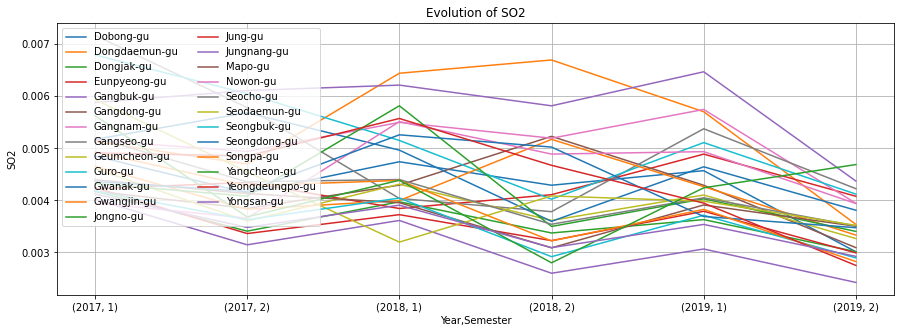

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['SO2'].unstack().plot(ax=ax)
ax.set_ylabel("SO2")
ax.set_title("S02 Evolution")
ax.set_title("Evolution of SO2")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

In [29]:
district_list = df['District'].unique().tolist()

turbo_pallete = Turbo256[0:256:int(256/len(district_list) )][::-1]

In [30]:
gas_type = 'SO2'
df_SO2_semester = df.groupby(['Year','Semester', 'District']).mean()[gas_type].reset_index()

avg_semester = {}
for d in district_list:
    avg_semester[d] = np.array(df_SO2_semester.query('District == "' + d + '"')[gas_type])

In [31]:
from bokeh.palettes import Turbo256
from bokeh.models import Legend

x_axis = np.array([2017,2017.5,2018,2018.5,2019,2019.5])

fig = figure(title="Interactive overall evolution of the SO in Bokeh", plot_width=1000, plot_height=700, x_axis_type="linear")

count = 0
for d in district_list:
    line = fig.line(x_axis, avg_semester[d], legend_label=d, color=turbo_pallete[count] ,line_width=3)
    fig.circle(x_axis, avg_semester[d], legend_label=d, color=turbo_pallete[count], fill_color='white', size=7)
    count += 1
# plot title
fig.legend.title = 'Gas'
# Relocate Legend
fig.legend.location = 'bottom_left'
# Click to hide/show lines
fig.legend.click_policy = 'hide'
# Add Hover
fig.add_tools(HoverTool(tooltips=[('SO2', '@y{%.5f}')], formatters={'@y' : 'printf'} ))

show(fig)

**Conclusion:**

🇺🇸

We can conclude that the average SO2 has decreased over the years

🇧🇷

Podemos concluir a média de SO2 tem diminuido com o decorrer dos anos

## What is the average gas pollution for each district and which has more or less? <a id ='index11'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

<span style='font-size: 15pt'>Plot of total average per districts to each pollutant</span>

In [32]:
primary_column = 'SO2'
target_column = 'total_average_SO2'

df1 = df.groupby(['District']).mean()[primary_column].reset_index()

eda_foward_2_plots(df1, primary_column, target_column, "SO total average per district", "The first and last 8 on average for SO")

In [33]:
primary_column = 'CO'
target_column = 'total_average_CO'

df1 = df.groupby(['District']).mean()[primary_column].reset_index()

eda_foward_2_plots(df1, primary_column, target_column, "CO total average per district", "The first and last 8 on average for CO")

In [34]:
primary_column = 'O3'
target_column = 'total_average_O3'

df1 = df.groupby(['District']).mean()[primary_column].reset_index()

eda_foward_2_plots(df1, primary_column, target_column,
                   "O3 total average per district", "The first and last 8 on average for O3")

In [35]:
primary_column = 'PM10'
target_column = 'total_average_PM10'

df1 = df.groupby(['District']).mean()[primary_column].reset_index()

eda_foward_2_plots(df1, primary_column, target_column,
                   "PM10 total average per district", "The first and last 8 on average for PM10")

In [36]:
primary_column = 'PM2.5'
target_column = 'total_average_PM2.5'

df1 = df.groupby(['District']).mean()[primary_column].reset_index()

eda_foward_2_plots(df1, primary_column, target_column,
                   "PM2.5 total average per district", "The first and last 8 on average for PM2.5")

In [37]:
primary_column = 'NO2'
target_column = 'total_average_NO2'

df1 = df.groupby(['District']).mean()[primary_column].reset_index()

eda_foward_2_plots(df1, primary_column, target_column,
                   "NO2 total average per district", "The first and last 8 on average for NO2")

**Conclusion**

🇺🇸

It is curious to realize that for each gas, the district with the highest and lowest average differs between the gases

🇧🇷

É curioso perceber que para cada gas, o distrito com maior e mnor media diferem entre os gases

## Are there any negative measurements of pollutants? <a id ='index12'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

<span style='font-size: 15pt'>Analyse dangerous measurements of each pollutant</span>

**Feature Engineering**: Create Good, Normal, Bad, Very Bad to each pollutant

In [38]:
# Create `df_measures`

# Filter only measures columns
l_cols = df.columns.tolist()[1:8]
df_measures = df[l_cols]

# Generate level dangerous to each gas
l_level = [x+'_Level' for x in df_measures.columns.tolist()[1:] ]
for l in l_level:
    df_measures[l] = generate_level_danger_gas_series(df_measures, l[:-6])
df_measures = df_measures.reset_index().drop('index', axis = 1)

# output
df_measures.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,District,SO2,NO2,O3,CO,PM10,PM2.5,SO2_Level,NO2_Level,O3_Level,CO_Level,PM10_Level,PM2.5_Level
0,Jongno-gu,0.004,0.059,0.002,1.2,73.0,57.0,Good,Normal,Good,Good,Normal,Bad
1,Jongno-gu,0.004,0.058,0.002,1.2,71.0,59.0,Good,Normal,Good,Good,Normal,Bad
2,Jongno-gu,0.004,0.056,0.002,1.2,70.0,59.0,Good,Normal,Good,Good,Normal,Bad
3,Jongno-gu,0.004,0.056,0.002,1.2,70.0,58.0,Good,Normal,Good,Good,Normal,Bad
4,Jongno-gu,0.003,0.051,0.002,1.2,69.0,61.0,Good,Normal,Good,Good,Normal,Bad


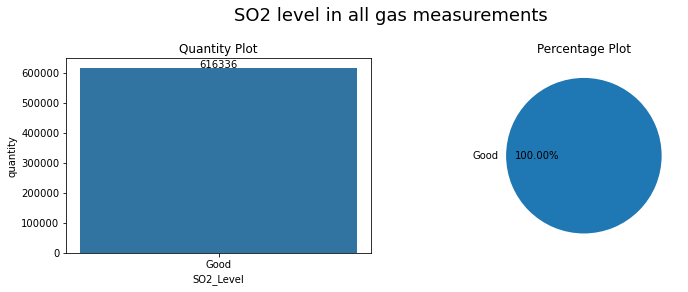

In [39]:
eda_categ_feat_desc_plot(df_measures['SO2_Level'], 'SO2 level in all gas measurements')

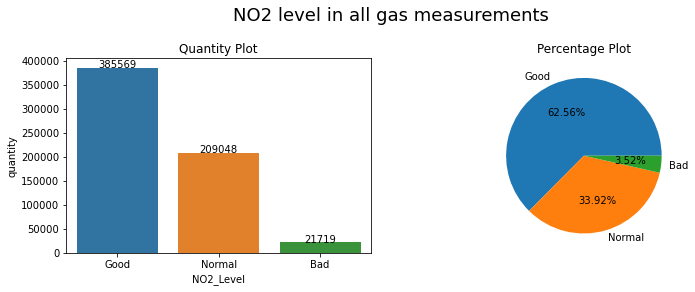

In [40]:
eda_categ_feat_desc_plot(df_measures['NO2_Level'], "NO2 level in all gas measurements")

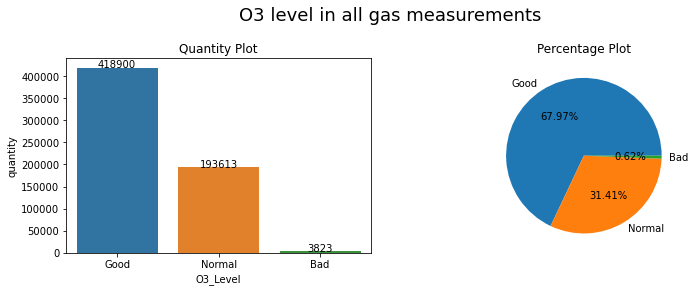

In [41]:
eda_categ_feat_desc_plot(df_measures['O3_Level'], 'O3 level in all gas measurements')

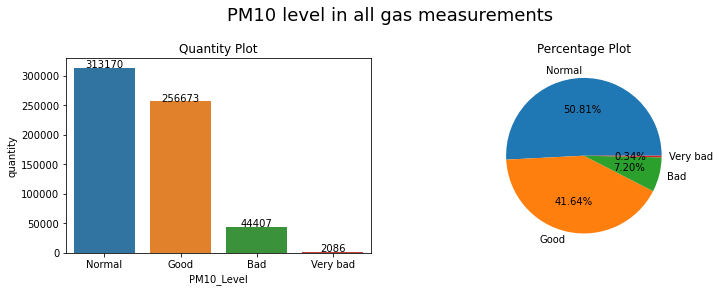

In [42]:
eda_categ_feat_desc_plot(df_measures['PM10_Level'], 'PM10 level in all gas measurements')

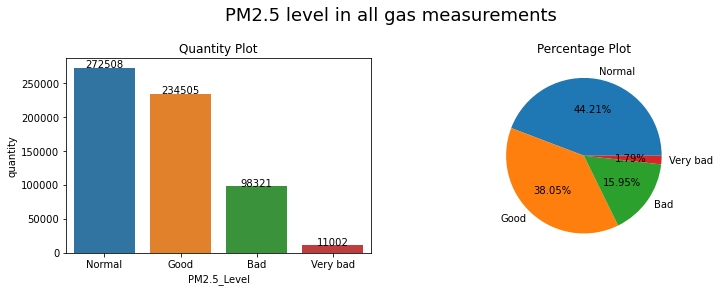

In [43]:
eda_categ_feat_desc_plot(df_measures['PM2.5_Level'], "PM2.5 level in all gas measurements")

**Conclusion**

🇺🇸

Good(Blue) < Normal(Green) < Bad(Yellow) < Very bad(Red)

+ SO2: All records seens Good
+ NO2: 3,52% Bad
+ 03: 0,62% Bad
+ PM10: 7,20% Bad and 0,34% Very Bad
+ PM2.5: 15.95% Bad and 1,79% Very Bad

There are few medications considered bad

🇧🇷

Good(Blue) < Normal(Green) < Bad(Yellow) < Very bad(Red)

+ SO2: Todos os registro sofram bons *Good*
+ NO2: 3,52% *Bad*
+ 03: 0,62% *Bad*
+ PM10: 7,20% *Bad* e *0,34%* Very Bad
+ PM2.5: 15.95% *Bad* e *1,79%* Very Bad

Há poucas medicações consideradas ruins



## Where is Bad and Very Bads measures? <a id ='index13'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 30px" data-toggle="popover">Go to TOC</a>

In [44]:
# Getting Data Frame with rows where exist 'Bad' or 'Very Bad' on measures gas level

gas_level_list = list(df_measures.columns)[7:]

cond = df_measures.isin(['Bad', 'Very Bad'])
cond = cond[ cond[gas_level_list] == True].dropna(how="all")
list_remove = list(cond.index)
df_bad = df_measures.iloc[list_remove]
df_bad.head()

,District,SO2,NO2,O3,CO,PM10,PM2.5,SO2_Level,NO2_Level,O3_Level,CO_Level,PM10_Level,PM2.5_Level
0,Jongno-gu,0.004,0.059,0.002,1.2,73.0,57.0,Good,Normal,Good,Good,Normal,Bad
1,Jongno-gu,0.004,0.058,0.002,1.2,71.0,59.0,Good,Normal,Good,Good,Normal,Bad
2,Jongno-gu,0.004,0.056,0.002,1.2,70.0,59.0,Good,Normal,Good,Good,Normal,Bad
3,Jongno-gu,0.004,0.056,0.002,1.2,70.0,58.0,Good,Normal,Good,Good,Normal,Bad
4,Jongno-gu,0.003,0.051,0.002,1.2,69.0,61.0,Good,Normal,Good,Good,Normal,Bad


In [45]:
my_df_bad = df_bad['District'].value_counts().reset_index().rename(columns={'index': 'District', 'District': 'count_bad_measures'})
my_df_bad['count_bad_measures'] = my_df_bad['count_bad_measures'].astype(float)

primary_column = 'count_bad_measures'
target_column = 'count_bad_measures'

eda_foward_2_plots(my_df_bad, primary_column, target_column,
                   "Counting 'Bad' and 'Very Bad' values for all pollutants", "The first and last 8 Counting 'Bad' and 'Very Bad' ")

**Conclusion**

🇺🇸

The region with the greatest amount of choice 'Bad' or 'Very bad' is the south-west, with the districts of Gwanak-gu in 1 ° and Yeongdeungpo-gu in 2 °.

Note that:
+ The north has less research ruins than the south
+ The east has fewer ruins than the west

In addition, the northern districts near the bukhasan national park were the lowest levels of negative level

🇧🇷

A região com maior quantidade de medições 'Ruim' ou 'Muito ruim' é o sul d'oeste, com os distritos de Gwanak-gu em 1° e Yeongdeungpo-gu em 2°.

Nota-se que que:
+ O norte tem menos medições ruins queo que o sul
+ O leste tem menos medições ruins que o oeste

Além disso, os distritos ao norte próximos do parque nacional de bukhasan foram os que apresentaram menor nível de medições negativas



## FeedBack <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px" data-toggle="popover">Go to TOC</a>

🇺🇸

This kernel is under development and new ideas can be added. Suggestions for improvements, new ideas for research or errors can be commented on, I would be grateful.

If you like it, vote positively!

🇧🇷

Este Kernel está em desenvolvimento e novas ideias podem ser adicionadas. Sujestões de melhorias, novas ideias para investigação ou erros podem ser comentados, ficaria grato.

Se você gostar, vote positivamente!